In [2]:
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt

(480, 640)


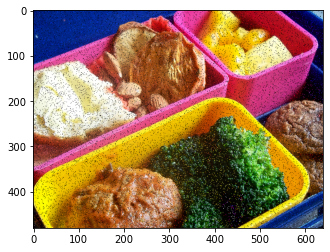

In [23]:
#read image
src = cv2.imread("train2017/000000000009.jpg", cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

'''
cv2.imshow("h", h)
cv2.imshow("s", s)
cv2.imshow("v", v)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''
#add noise to V value
def add_noise(v, prob):
    output = np.zeros(v.shape, np.uint8)

    thres = 1 - prob
    for i in range(len(v)): # 480
        for j in range(len(v[1])): # 640
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = v[i][j]
    print(output.shape)
    return output

output = add_noise(v, 0.05)
img = cv2.merge([h, s, output])
img = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)

#**OpenCV에서는 BGR, matplot에서는 RGB이기 때문에 이상하게 표시된다 -> RGB로 변환**#
B, G, R = cv2.split(img)
img = cv2.merge([R, G, B])
plt.imshow(img)
plt.show()

#cv2.imwrite("sample", output, [cv2.IMWRITE_JPEG_QUALITY, 10])